In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("salaries.csv")

### Data Cleaning Phase 1
###### Here we will begin cleaning and evaluating the data, we want to understand our dataset and make sure our data is accurate, and ready to be used for Machine Learning Applications

In [4]:
# Start by looking at shape of our dataframe to see columns and rows
print(df.shape)

(88584, 11)


In [5]:
# Next get a quick summary of numerical counts such as mean, count, SD, min, max and quantiles
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,88584.000000,8.858400e+04,88584.000000,88584.000000
mean,2024.034758,1.619323e+05,157567.798417,21.286011
std,0.620370,1.965317e+05,73531.373158,40.831018
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,106097.250000,0.000000
50%,2024.000000,1.470000e+05,146307.000000,0.000000
75%,2024.000000,1.995000e+05,198600.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
# Summary statistics for categorical columns
print(df.describe(include=['object']))


       experience_level employment_type       job_title salary_currency  \
count             88584           88584           88584           88584   
unique                4               4             312              26   
top                  SE              FT  Data Scientist             USD   
freq              51596           88111           13156           83994   

       employee_residence company_location company_size  
count               88584            88584        88584  
unique                 96               90            3  
top                    US               US            M  
freq                79705            79762        85667  


In [7]:
# Check data types of the columns
print(df.dtypes)


work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [8]:
# Check for missing values in the DataFrame
print(df.isnull().sum())


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


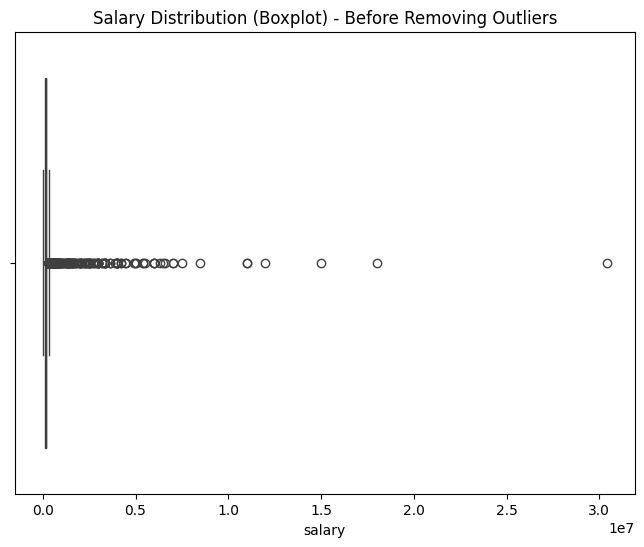

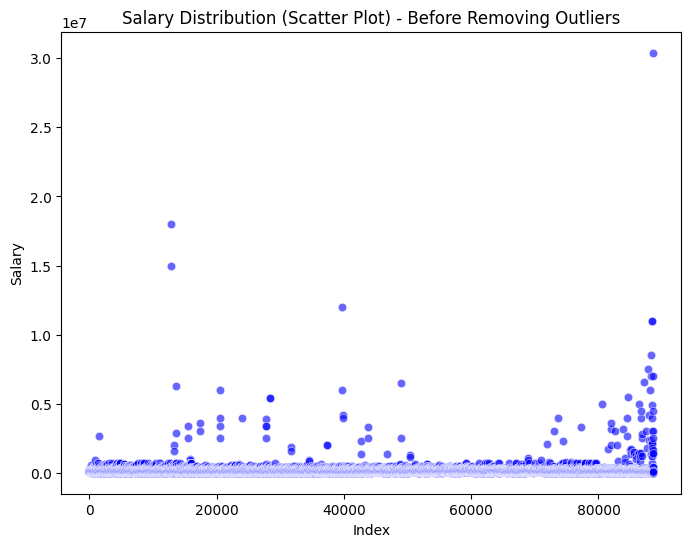

In [9]:
# Here we want to look at the outliers based on salary column and we are going to see
# if we need to delete any outliers

# first we will visualize to get a better understanding of the distribution of our salary column


# Boxplot to visualize the distribution of the salary column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['salary'])
plt.title('Salary Distribution (Boxplot) - Before Removing Outliers')
plt.show()

# Alternatively, you can plot the data with the salary values marked
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.index, y=df['salary'], color='blue', alpha=0.6)
plt.title('Salary Distribution (Scatter Plot) - Before Removing Outliers')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.show()



In [13]:
# Step 1: Calculate the IQR for the 'salary' column
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define the lower and upper bounds for salary
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Find the outliers (rows that will be removed)
outliers = df[(df['salary'] < lower_bound) | (df['salary'] > upper_bound)]

# Step 4: Filter the dataset to remove outliers
df_cleaned = df[(df['salary'] >= lower_bound) & (df['salary'] <= upper_bound)]

# Step 5: Check how many rows were removed
print(f"Rows removed: {len(outliers)}")

# Step 6: Display the removed rows (outliers)
print("Removed Rows (Outliers):")
print(outliers)

# Optionally, display the cleaned data
print("Cleaned Data (After Removing Outliers):")
print(df_cleaned.head())



Rows removed: 1751
Removed Rows (Outliers):
       work_year experience_level employment_type  \
30          2025               EN              FT   
32          2025               EN              FT   
190         2025               SE              FT   
264         2025               SE              FT   
342         2025               SE              FT   
...          ...              ...             ...   
88559       2021               EN              FT   
88564       2021               MI              FT   
88576       2021               MI              FT   
88579       2020               SE              FT   
88583       2021               SE              FT   

                                job_title   salary salary_currency  \
30                     Research Scientist   358000             USD   
32                     Research Scientist   358000             USD   
190                              Engineer   600593             USD   
264                              Engine

In [14]:
# Here we remove all duplicates from the dataset 

# Remove exact duplicates from the dataset
df_cleaned_no_duplicates = df_cleaned.drop_duplicates()

# Check how many rows were removed
print(f"Rows removed: {len(df_cleaned) - len(df_cleaned_no_duplicates)}")

# Optionally, view the first few rows of the cleaned data (without duplicates)
print(df_cleaned_no_duplicates.head())


Rows removed: 43620
   work_year experience_level employment_type                 job_title  \
0       2025               MI              FT  Customer Success Manager   
1       2025               SE              FT                  Engineer   
2       2025               SE              FT                  Engineer   
3       2025               SE              FT         Applied Scientist   
4       2025               SE              FT         Applied Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   57000             EUR          60000                 NL            50   
1  165000             USD         165000                 US             0   
2  109000             USD         109000                 US             0   
3  294000             USD         294000                 US             0   
4  137600             USD         137600                 US             0   

  company_location company_size  
0               NL            L 

In [15]:
df_cleaned_no_duplicates

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
88577,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L
88578,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
88580,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
88581,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


### Data Visualization
###### Here we want to start visualizing the data to get a better idea of column distribution, and what columns we want to use/combine for feature development

In [16]:
# Now that we have cleaned our data lets get some summary stats again
# Summary statistics for numerical columns
print(df_cleaned_no_duplicates.describe())


          work_year         salary  salary_in_usd  remote_ratio
count  43213.000000   43213.000000   43213.000000  43213.000000
mean    2024.065698  145518.758244  145983.874644     25.096614
std        0.710021   65942.302149   65400.633521     43.186273
min     2020.000000   14000.000000   15000.000000      0.000000
25%     2024.000000   95000.000000   95700.000000      0.000000
50%     2024.000000  137611.000000  137750.000000      0.000000
75%     2024.000000  187038.000000  187000.000000     50.000000
max     2025.000000  339500.000000  412502.000000    100.000000


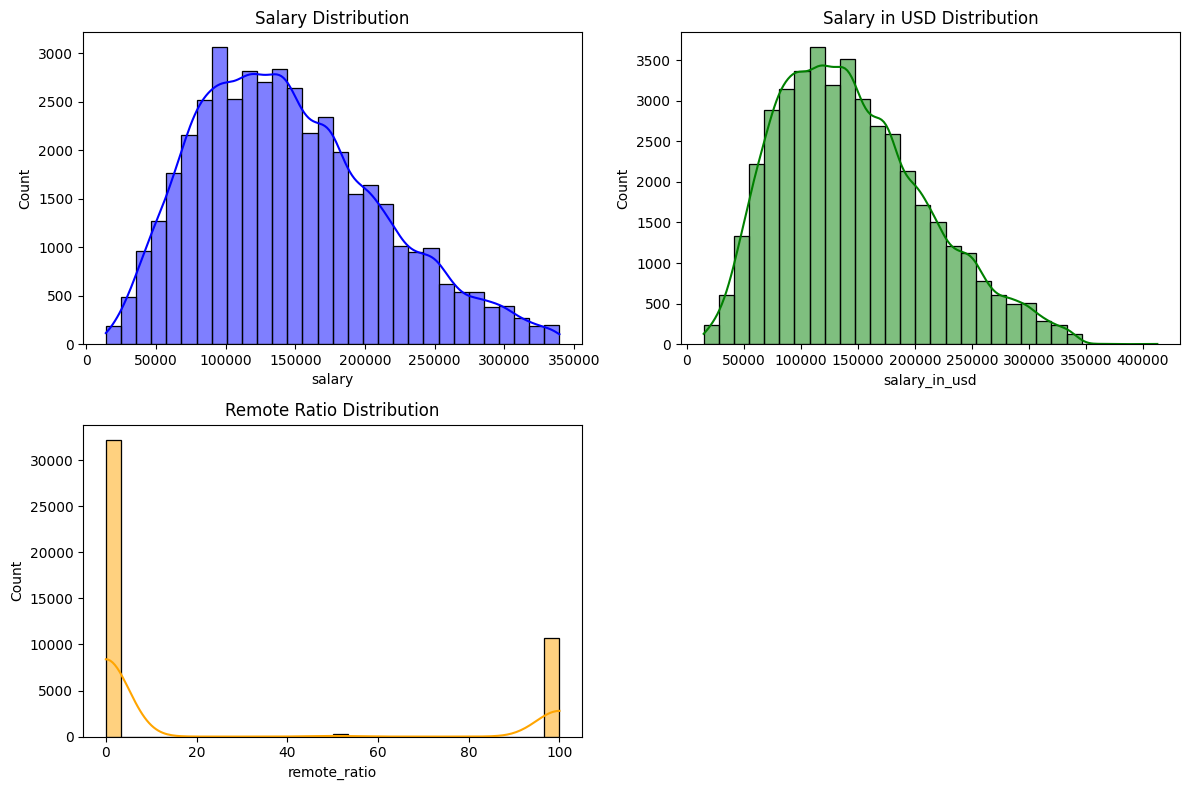

In [17]:
# Visualizing the distribution of salary, salary_in_usd, and remote_ratio
plt.figure(figsize=(12, 8))

# Salary Distribution
plt.subplot(2, 2, 1)
sns.histplot(df_cleaned_no_duplicates['salary'], bins=30, kde=True, color='blue')
plt.title('Salary Distribution')

# Salary in USD Distribution
plt.subplot(2, 2, 2)
sns.histplot(df_cleaned_no_duplicates['salary_in_usd'], bins=30, kde=True, color='green')
plt.title('Salary in USD Distribution')

# Remote Ratio Distribution
plt.subplot(2, 2, 3)
sns.histplot(df_cleaned_no_duplicates['remote_ratio'], bins=30, kde=True, color='orange')
plt.title('Remote Ratio Distribution')

plt.tight_layout()
plt.show()


In [19]:
# Visualizing the distribution of categorical variables
# Potential Challenges:
# Too many job titles to visualize, show most popular maybe word plot
# Salary currency distribution hard to visualize



